In [2]:
print("teste")

teste

In [42]:
v = zeros(2,0)
c = [1,2]

2-element Vector{Int64}:
 1
 2

In [77]:
v = hcat(v,[3,4])


2×4 Matrix{Float64}:
 1.0  3.0  3.0  3.0
 2.0  3.0  3.0  4.0

In [83]:
a = transpose(v)
a[:,1]

4-element Vector{Float64}:
 1.0
 3.0
 3.0
 3.0

In [40]:
nx, ny = 64, 64 # number of grid points
Lx, Ly = 2.0*pi, 2.0*pi      # size of the domain in each direction

# constructing the physical grid (x,y)
dx, dy = Lx/nx, Ly/ny
 x = 0:dx:Lx-dx
 y = 0:dy:Ly-dy

X  = zeros(nx,ny)
Y  = zeros(nx,ny)
for j in 1:ny, i in 1:nx
     X[i, j] = x[i]
     Y[i, j] = y[j]
end

In [63]:
vecx = zeros(nx,ny)

vecx = X+Y

64×64 Matrix{Float64}:
 0.0        0.0981748  0.19635   0.294524  …   5.98866   6.08684   6.18501
 0.0981748  0.19635    0.294524  0.392699      6.08684   6.18501   6.28319
 0.19635    0.294524   0.392699  0.490874      6.18501   6.28319   6.38136
 0.294524   0.392699   0.490874  0.589049      6.28319   6.38136   6.47953
 0.392699   0.490874   0.589049  0.687223      6.38136   6.47953   6.57771
 0.490874   0.589049   0.687223  0.785398  …   6.47953   6.57771   6.67588
 0.589049   0.687223   0.785398  0.883573      6.57771   6.67588   6.77406
 0.687223   0.785398   0.883573  0.981748      6.67588   6.77406   6.87223
 0.785398   0.883573   0.981748  1.07992       6.77406   6.87223   6.97041
 0.883573   0.981748   1.07992   1.1781        6.87223   6.97041   7.06858
 0.981748   1.07992    1.1781    1.27627   …   6.97041   7.06858   7.16676
 1.07992    1.1781     1.27627   1.37445       7.06858   7.16676   7.26493
 1.1781     1.27627    1.37445   1.47262       7.16676   7.26493   7.36311
 ⋮

In [89]:
function mindist2(x, val)
    # using enumerate to avoid indexing
    min_i = 0
    min_x = Inf
    for (i, xi) in enumerate(x)
        dist = abs(xi - val)
        if dist < min_x
            min_x = dist
            min_i = i
        end
    end
    return min_i
end
mindist2(vecx,0.782664)

9

In [84]:
@. mod(vecx,pi)

64×64 Matrix{Float64}:
 0.0        0.0981748  0.19635    …  2.84707    2.94524    3.04342
 0.0981748  0.19635    0.294524      2.94524    3.04342    0.0
 0.19635    0.294524   0.392699      3.04342    0.0        0.0981748
 0.294524   0.392699   0.490874      0.0        0.0981748  0.19635
 0.392699   0.490874   0.589049      0.0981748  0.19635    0.294524
 0.490874   0.589049   0.687223   …  0.19635    0.294524   0.392699
 0.589049   0.687223   0.785398      0.294524   0.392699   0.490874
 0.687223   0.785398   0.883573      0.392699   0.490874   0.589049
 0.785398   0.883573   0.981748      0.490874   0.589049   0.687223
 0.883573   0.981748   1.07992       0.589049   0.687223   0.785398
 0.981748   1.07992    1.1781     …  0.687223   0.785398   0.883573
 1.07992    1.1781     1.27627       0.785398   0.883573   0.981748
 1.1781     1.27627    1.37445       0.883573   0.981748   1.07992
 ⋮                                ⋱                        
 1.9635     2.06167    2.15984       1.6

In [93]:
using DataFrames,CSV, FFTW
dx, dy = Lx/nx, Ly/ny
x = 0:dx:Lx-dx
y = 0:dy:Ly-dy

X  = zeros(nx,ny)
Y  = zeros(nx,ny)
for j in 1:ny, i in 1:nx
    X[i, j] = x[i]
    Y[i, j] = y[j]
end

# constructing the wavenumber grid (k,l)
k  = 2.0*pi/Lx * [0:nx/2; -nx/2+1:-1];
l  = 2.0*pi/Ly * [0:ny/2; -ny/2+1:-1];

Kx = zeros(nx, ny)
Ky = zeros(nx, ny)
for j in 1:ny, i in 1:nx
   Kx[i, j] = k[i] #cria o grid em Kx
   Ky[i, j] = l[j] #cria o grid em Ky
end

In [94]:
phih = Matrix(CSV.read("Poth.csv", DataFrame, header=false,delim='\t', types=Complex{Float64}))
phix = real(ifft(im*Kx.*phih))     # calculate phix velocity u(x,y,t)
phiy = real(ifft(im*Ky.*phih))

64×64 Matrix{Float64}:
 -0.0125393   -0.0121989   -0.0118149   …  -0.0131905   -0.0128219
 -0.0130886   -0.0127854   -0.0124998      -0.0135812   -0.0133205
 -0.0135535   -0.0133147   -0.0131634      -0.0138864   -0.0137305
 -0.0139385   -0.0137934   -0.0138055      -0.0141109   -0.0140525
 -0.0142505   -0.0142278   -0.0144223      -0.0142581   -0.014289
 -0.0144979   -0.0146215   -0.0150064   …  -0.0143301   -0.0144449
 -0.0146885   -0.0149747   -0.0155471      -0.0143292   -0.0145267
 -0.0148277   -0.0152837   -0.0160323      -0.0142586   -0.0145421
 -0.0149179   -0.015542    -0.0164491      -0.0141228   -0.0144983
 -0.0149581   -0.0157409   -0.0167857      -0.0139267   -0.0144003
 -0.0149444   -0.0158712   -0.0170322   …  -0.0136751   -0.0142511
 -0.0148714   -0.0159241   -0.0171807      -0.0133719   -0.0140508
 -0.0147334   -0.0158923   -0.0172261      -0.0130195   -0.013798
  ⋮                                     ⋱               
 -0.00199088  -0.00225524  -0.00243497     -0.00209

In [104]:
phiy[3,3]

-0.013163390166547873

In [96]:
mindist2(x,3.1)

33

In [105]:
using Random

In [26]:
using CSV, DataFrames, PyPlot

In [65]:
x = Matrix(CSV.read("pos.csv", DataFrame, header=false,delim='\t', types=Float64))


10000×4 Matrix{Float64}:
    0.0          0.0         0.0           0.0
    0.128263     0.198117    0.0175438     0.160726
    0.386497     0.574956    0.0526315     0.476873
    0.652814     0.936069    0.0877192     0.787716
    0.925509     1.30085     0.122807      1.09856
    1.1982       1.66563     0.157895      1.40431
    1.4709       2.0124      0.192982      1.70125
    1.74925      2.34115     0.22807       1.99447
    2.03325      2.67242     0.263158      2.2877
    2.31726      3.00622     0.298245      2.58092
    2.60127      3.32428     0.333333      2.86984
    2.89007      3.62662     0.368421      3.15258
    3.18367      3.92895     0.403508      3.43343
    ⋮                                   
 1565.78      1773.1       993.32       2048.84
 1565.83      1773.28      993.332      2049.0
 1565.88      1773.49      993.344      2049.15
 1565.94      1773.71      993.357      2049.29
 1565.99      1773.93      993.369      2049.44
 1566.04      1774.15      993.381

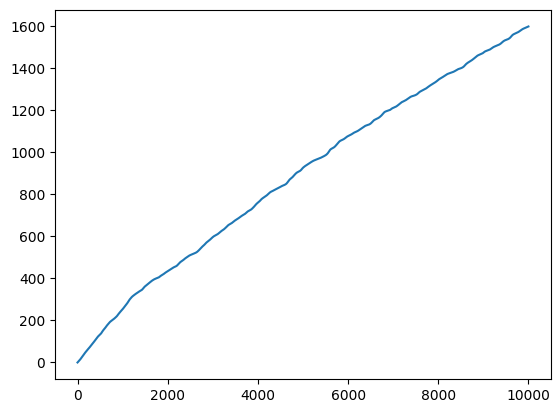

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff584592ec0>

In [68]:
AA = sqrt.((x[:,1].-x[1,1]).^2).+sqrt.((x[:,2].-x[1,2]).^2).+sqrt.((x[:,3].-x[1,3]).^2).+sqrt.((x[:,4].-x[1,4]).^2)
AA = AA ./4
#yscale("log")
plot(AA)


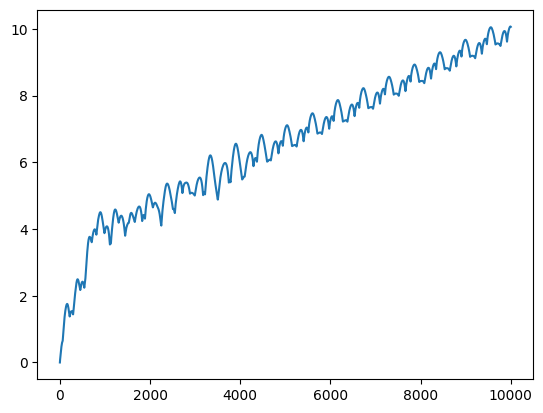

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff5847baaa0>

In [64]:
aux = 0
MSD = zeros(length(x[:,1]))
#push!(MSD,0)
for j in 2:2:8
    MSD += sqrt.((x[:,j].-x[1,j]).^2)
    #push!(MSD,aux/i)
end
#yscale("log")
plot(MSD./4)


In [52]:
MSD

10000-element Vector{Float64}:
 0.0
 6.384882566390495
 6.429608551043086
 6.473938970337928
 6.518269389632768
 6.560137937859272
 6.594578381057765
 6.627594574307068
 6.661717105428684
 6.6958396365503035
 6.722421677214977
 6.744993538210611
 6.767565399206247
 ⋮
 9.746257480398985
 9.725468160190509
 9.702969291689982
 9.680470423189453
 9.657971554688924
 9.634229229981251
 9.609854779492064
 9.583788911526353
 9.55772304356064
 9.531657175594928
 9.508026288600155
 9.484395401605381

In [59]:
a = [1,2]
a

2-element Vector{Int64}:
 1
 2